<a href="https://colab.research.google.com/github/Jeongmin0658/kentech_tutorial/blob/main/3_Pi/Importance_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importance Sampling

Importance sampling is a variance reduction technique used in Monte Carlo simulations. It is a method to estimate properties of a particular distribution, while only having samples generated from a different distribution rather than the distribution of interest.

Consider we are trying to estimate the quantity:

\[ E_f[X] = \int f(x) \, p(x) \, dx \]

where \( f(x) \) is some function, and \( p(x) \) is our target probability distribution function.

Instead of sampling directly from the distribution \( p(x) \), we introduce a new distribution \( q(x) \), from which it is easier to generate samples. We can then rewrite the equation as:

\[ E_f[X] = \int \frac{f(x) \, p(x)}{q(x)} \, q(x) \, dx \]

This is equivalent to the original equation, as we have simply multiplied and divided by \( q(x) \).

However, we can interpret this equation differently: if we draw samples from the distribution \( q(x) \), the expected value of \( \frac{f(x) \, p(x)}{q(x)} \) under the distribution \( q(x) \) gives us an estimate of the integral.

So, to use importance sampling, we draw samples from \( q(x) \) and then calculate the average of \( \frac{f(x) \, p(x)}{q(x)} \) over these samples. If \( q(x) \) is chosen wisely, this can give us a much more accurate estimate of the integral than if we had drawn samples from \( p(x) \).

We should choose \( q(x) \) such that it is close to \( p(x) \) where \( f(x) \) is large, which means we want to draw more samples from the regions of the space where \( f(x) \) contributes significantly to the integral.

This results in a reduction in variance and an improvement in the accuracy of the integral estimation, because we're focusing our sampling on the "important" regions of the space, i.e., where \( f(x) \, p(x) \) is large.

However, a poorly chosen importance distribution can actually increase the variance, so choosing a good importance distribution is a key challenge in importance sampling.


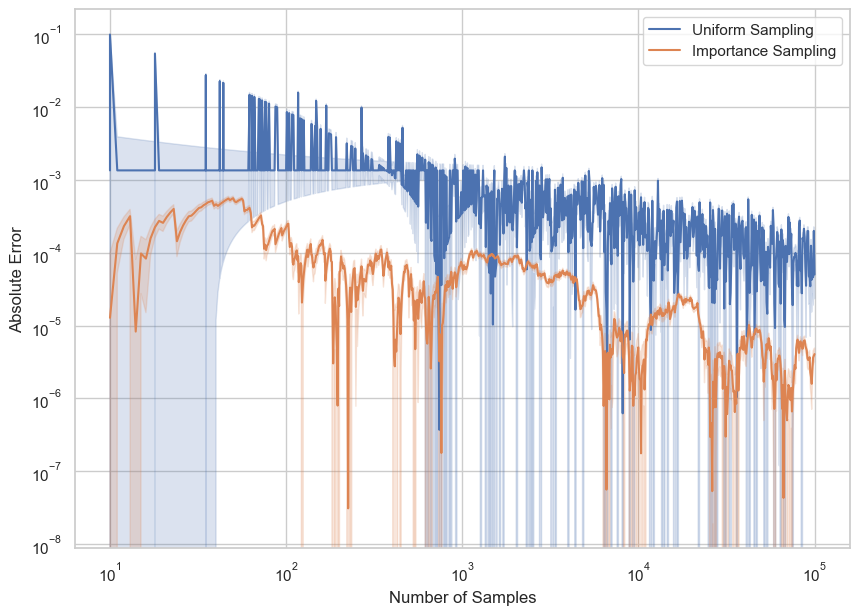

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

sns.set(style='whitegrid')

# Define function for importance sampling
def importance_sampling(mu_proposal, samples):
    # Calculate the importance weights
    weights = norm.pdf(samples, 0, 1) / norm.pdf(samples, mu_proposal, 1)
    return weights

# True probability (from Z-table)
true_prob = 1 - norm.cdf(3, 0, 1)

# Number of iterations and samples per iteration
num_iterations = 1000
num_samples = np.logspace(1, 5, num=num_iterations).astype(int)

# Arrays to store estimates
uniform_samples = []
importance_samples = []

# Proposal mean for importance sampling
mu_proposal = 3

# Generate samples for importance sampling
importance_raw_samples = np.random.normal(mu_proposal, 1, num_samples[-1])

# Iteratively calculate estimates
for i in num_samples:
    # Uniform sampling estimates
    uniform_raw_samples = np.random.normal(0, 1, i)
    uniform_samples.append(np.mean(uniform_raw_samples > 3))

    # Importance sampling estimates
    weights = importance_sampling(mu_proposal, importance_raw_samples[:i])
    importance_samples.append(np.mean(weights * (importance_raw_samples[:i] > 3)))

# Convert lists to arrays
uniform_samples = np.array(uniform_samples)
importance_samples = np.array(importance_samples)

# Calculate the standard errors
uniform_stderrs = np.std(uniform_samples) / np.sqrt(num_samples)
importance_stderrs = np.std(importance_samples) / np.sqrt(num_samples)

# Create plot
plt.figure(figsize=(10, 7))
plt.loglog(num_samples, np.abs(uniform_samples - true_prob), label='Uniform Sampling')
plt.loglog(num_samples, np.abs(importance_samples - true_prob), label='Importance Sampling')
plt.fill_between(num_samples, np.abs(uniform_samples - true_prob) - 1.96 * uniform_stderrs,
                 np.abs(uniform_samples - true_prob) + 1.96 * uniform_stderrs, color='C0', alpha=0.2)
plt.fill_between(num_samples, np.abs(importance_samples - true_prob) - 1.96 * importance_stderrs,
                 np.abs(importance_samples - true_prob) + 1.96 * importance_stderrs, color='C1', alpha=0.2)
plt.xlabel('Number of Samples')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()
